# Homework 6. KNN - Handwritten digits

***Double Click here to edit this cell***

- Name: 이재혁
- Student ID: 201502552 
- Submission date: 2020 - 06 -07

### We have 1797 handwritten digits of size 8x8 

In [295]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [296]:
digits.target.shape


(1797,)

### Try with some handwritten images

Target is 0
Data is :

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

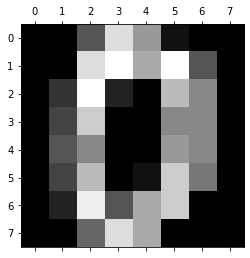

In [297]:
%matplotlib inline

import matplotlib.pyplot as plt 

k = 0
print('Target is {}'.format(digits.target[k]))
print('Data is :\n')
print(digits.data[k].reshape(8,8))
plt.gray()
plt.matshow(digits.images[k]) 
plt.show() 

# Problem 1 (30 pts)

- We want to classify handwritten digits using **k nearest neighbor classifier**

## STEP 1

- import whatever you need
- don't modify the random number seed
- you must set "np.random.seed(0)"" before you do "train_test_split"
- Split the data into training dataset (2/3 of the total data), test dataset(1/3 of the total data)

In [298]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

np.random.seed(0)
digits = datasets.load_digits()

# YOUR CODE HERE
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(digits.data),digits.target, test_size=0.33,random_state= np.random.seed(0))
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,test_size=0.1,random_state= np.random.seed(0))

## STEP 2

- Use sklearn k nearest neighbor classifier to classify digits
- Print confusion matrix, classification report, accuracy
- This homework will be graded based on **accuracy**

In [299]:
# YOUR CODE HERE
kVals = range(1, 11, 1)
accuracies = []
for k in range(1, 11, 1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
i = np.argmax(accuracies)
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)

cm = confusion_matrix(testLabels,predictions)
cr = classification_report(testLabels, predictions)
accuracy = np.mean(accuracies)
print('confusion matrix : \n')
print(cm)
print('\n\nclassification_report : \n')
print(cr)
print('Average accuracy = {:.2f}%'.format(accuracy*100))

k=1, accuracy=99.17%
k=2, accuracy=98.35%
k=3, accuracy=99.17%
k=4, accuracy=98.35%
k=5, accuracy=99.17%
k=6, accuracy=98.35%
k=7, accuracy=98.35%
k=8, accuracy=97.52%
k=9, accuracy=97.52%
k=10, accuracy=97.52%
confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 64  0]
 [ 0  0  0  3  0  1  0  0  0 58]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        62
           3       0.93      1.00      0.96        55
           4       1.00      1.00      1.00        50
           5       0.98      0.97      0.98        65
           6       0.99      1

My result:
```
confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 64  0]
 [ 0  0  0  3  0  1  0  0  0 58]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        62
           3       0.93      1.00      0.96        55
           4       1.00      1.00      1.00        50
           5       0.98      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        56
           8       1.00      0.96      0.98        67
           9       0.98      0.94      0.96        62

    accuracy                           0.98       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.98      0.98       594

Average accuracy = 98.48%
```

## State-of-the-Art of MNIST classification: 99.79%

- https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html
- MNIST dataset is much bigger dataset: 60,000 training images and 10,000 testing images

# Problem 2 (30 pts)

- If you choose any hyperparameters and you did any transformation in your data, justify your choice and transformation.
- The justification must be code, data, or plotted images, **not your guess!!!**
- This must be a longer code. 
- Use plotted image whenever possible.
- You may add as many cells as you want.
- To add a cell, insert->insert cell or click '+' button above in the notebook.
- you must set "np.random.seed(0)"" before you do "train_test_split"

think number: 2


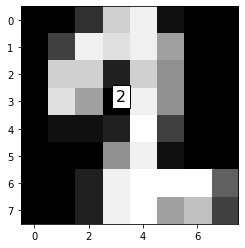

think number: 3


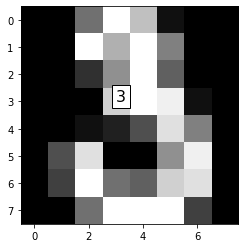

think number: 1


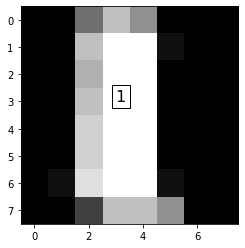

think number: 8


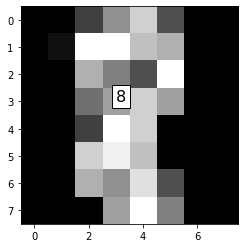

think number: 7


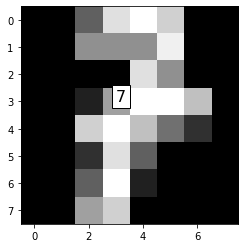

In [300]:
# ADD YOUR CELL
import matplotlib.pyplot as plt

for i in np.random.randint(0, high=len(testLabels), size=(5,)):
    image = testData[i]
    prediction = model.predict([image])[0]
    imgdata = np.array(image, dtype='float')
    pixels = imgdata.reshape((8,8))
    plt.imshow(pixels,cmap='gray')
    plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
    print("think number: {}".format(prediction))
    plt.show()

In [301]:
# ADD YOUR CELL

for k in range(1, 30, 1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))

cm = confusion_matrix(testLabels,predictions)
cr = classification_report(testLabels, predictions)
accuracy = np.mean(accuracies)

print('confusion matrix : \n')
print(cm)
print('\n\nclassification_report : \n')
print(cr)
print('Average accuracy = {:.2f}%'.format(accuracy*100))
# you must set "np.random.seed(0)"" before you do "train_test_split"

k=1, accuracy=99.17%
k=2, accuracy=98.35%
k=3, accuracy=99.17%
k=4, accuracy=98.35%
k=5, accuracy=99.17%
k=6, accuracy=98.35%
k=7, accuracy=98.35%
k=8, accuracy=97.52%
k=9, accuracy=97.52%
k=10, accuracy=97.52%
k=11, accuracy=98.35%
k=12, accuracy=96.69%
k=13, accuracy=96.69%
k=14, accuracy=95.87%
k=15, accuracy=95.87%
k=16, accuracy=95.87%
k=17, accuracy=96.69%
k=18, accuracy=95.87%
k=19, accuracy=95.87%
k=20, accuracy=95.87%
k=21, accuracy=95.87%
k=22, accuracy=95.04%
k=23, accuracy=95.04%
k=24, accuracy=95.04%
k=25, accuracy=95.87%
k=26, accuracy=95.87%
k=27, accuracy=96.69%
k=28, accuracy=95.87%
k=29, accuracy=95.87%
confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 64  0]
 [ 0  0  0  3  0  1  0  0  0 58]]


classification_re

- This is my result. 

```
confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 61  1  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  0  0  0  0  0 65  0]
 [ 0  0  0  1  0  0  0  0  0 61]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      0.98      0.99        62
           3       0.96      1.00      0.98        55
           4       1.00      1.00      1.00        50
           5       1.00      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        56
           8       1.00      0.97      0.98        67
           9       0.98      0.98      0.98        62

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594

Average accuracy = 98.99%
```

### Written justification for your hyperparameter choice and data transformation

- 다차원 공간의 데이터를 다루는 머신러닝에 대해서 이론상으로 공부하면서 어렵게 생각했지만 실제로 코드를 짜보면서 느낀것은 재밌다는 느낌이 
든다는 것이다. 64차원이라는 공간을 내가 상상할수는 없지만 나의 코드로 64차원 공간의 데이터를 다룬다는것은 굉장히 흥미로웠다. 이전에 과제 k-nearest 문제를 풀때와는 다른 진짜 머신러닝에 활용되는 데이터 마이닝 기법을 사용한 기분이다.



## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit
- Run **all cells**
- Goto "File -> Print Preview" (If that doesn't work, you may print ipynb file in Google Chrome print menu)
- Print the page as pdf
- Submit the pdf file in google classroom
- No late homeworks accepted